In [2]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset into dataframe
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#rename the column Genre to Gender and insert it back into the original dataframe
df = df.rename(columns={'Genre': 'Gender'})

In [8]:
# check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

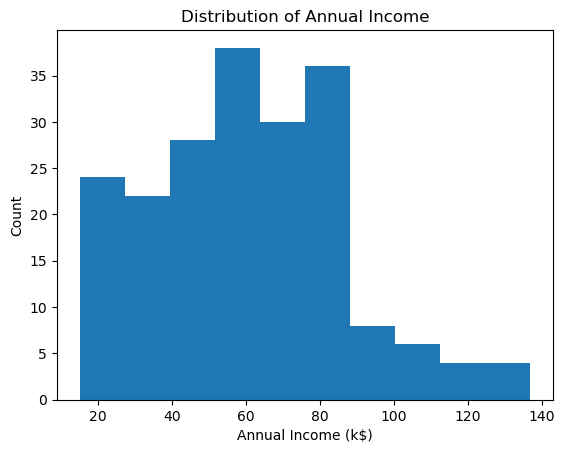

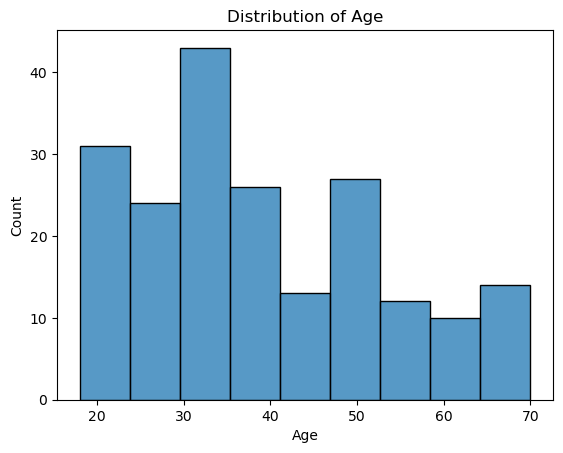

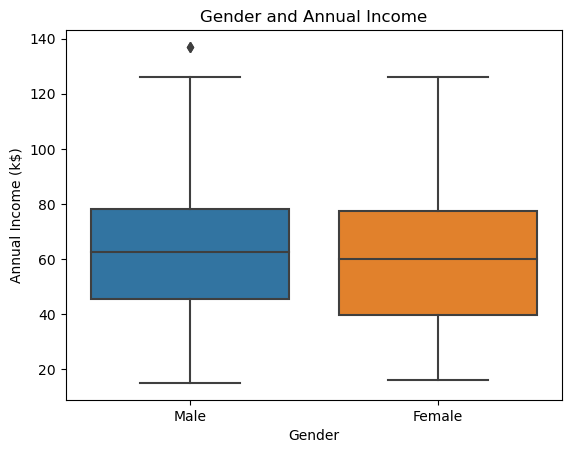

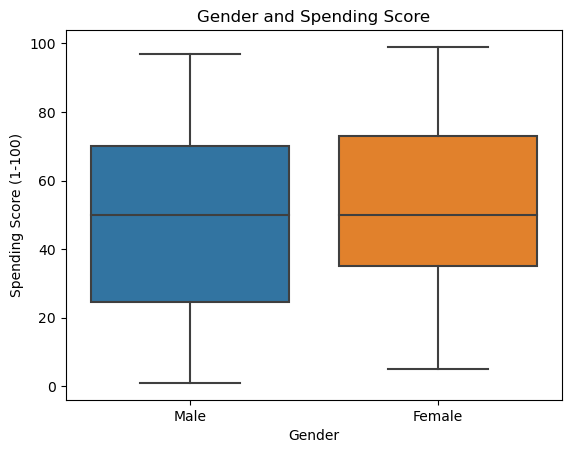

In [22]:
#create visualizations to survey the data
#here we create a histogram for Age, a boxplot to see the distribution between gender and annual income, and another
#boxplot for spending score and gender
plt.hist(df['Annual Income (k$)'], bins=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.show()

sns.histplot(df['Age'], kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

sns.boxplot(x=df['Gender'], y=df['Annual Income (k$)'])
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Gender and Annual Income')
plt.show()

sns.boxplot(x=df['Gender'], y=df['Spending Score (1-100)'])
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender and Spending Score')
plt.show()

In [10]:
#import the standard scaler and perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [11]:
#choose the appropriate features for clustering
X = pd.DataFrame(scaled_df, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

In [12]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [13]:
#import packages for k-means clustering
from sklearn.cluster import KMeans

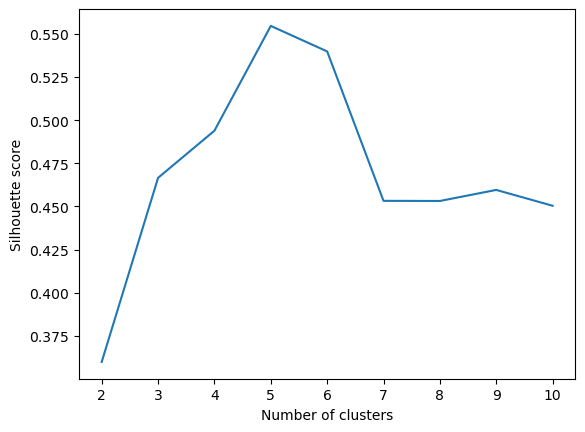

In [14]:
#use the Silhouette Method to determine the optimal number of clusters
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    scores.append(score)

plt.plot(range(2,11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [15]:
#train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5)
preds = kmeans.fit_predict(X)

In [16]:
#get the cluster assignments for each of the data points
X['Cluster'] = preds
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,1


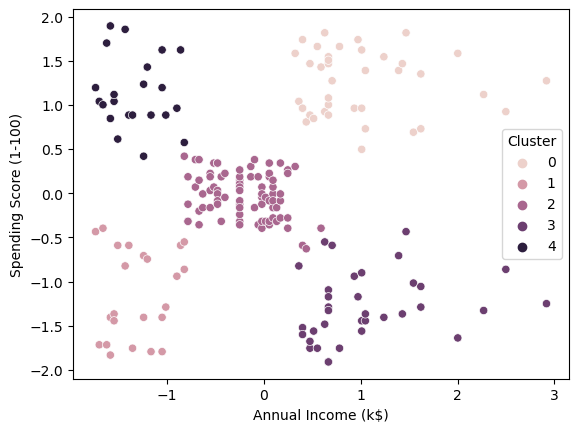

In [17]:
#visualize the clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=X)
plt.show()

Cluster 0: High income, low spending score
Cluster 1: Average income, average spending score
Cluster 2: Low income, high spending score
Cluster 3: High income, high spending score
Cluster 4: Low income, low spending score

# Report and Findings

Dataset Description: The dataset contains information about customers in a mall, including their customer ID, gender, age, annual income, and spending score.

Data Preprocessing, Feature Selection, and Scaling: The dataset was loaded into a pandas dataframe, and the first few rows were displayed. Missing values were checked and handled appropriately. Feature scaling was performed using StandardScaler to scale the 'Annual Income' and 'Spending Score' features. These two features were chosen for clustering. A new dataframe was created with only these features.

Determining the Optimal Number of Clusters: The Silhouette Method was used to determine the optimal number of clusters. The silhouette score was calculated for different values of k, and the optimal number of clusters was chosen based on the highest silhouette score.

Cluster Characteristics: The KMeans clustering algorithm was used to cluster the data into four clusters. A scatter plot of the selected features was created, colored by cluster assignment. The four clusters were interpreted and described as follows:
    Cluster 0 (red): Customers with high annual income and high spending score. These customers could be considered high-value customers and may be targeted for premium services or exclusive offers.
    Cluster 1 (green): Customers with low annual income and low spending score. These customers could be considered low-value customers and may require lower-priced products or discounts to retain their loyalty.
    Cluster 2 (blue): Customers with high annual income and low spending score. These customers may be targeted with personalized marketing campaigns to encourage them to spend more.
    Cluster 3 (purple): Customers with low annual income and high spending score. These customers may require more targeted marketing campaigns to encourage them to continue their high spending behavior.

Insights and Recommendations: Based on the analysis, the mall could develop targeted marketing campaigns for each cluster of customers to increase customer loyalty and revenue. For example, high-value customers in cluster 0 could be offered premium services, while low-value customers in cluster 1 could be offered discounts. Additionally, personalized marketing campaigns could be developed for customers in clusters 2 and 3 to encourage them to increase their spending. Overall, this analysis could help the mall improve its customer retention and revenue.